In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


# Import Libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [3]:
# Load the time series data into a pandas dataframe
Data = pd.read_csv(r'YOUR PATH')
data = pd.DataFrame(Data)

# Import Most used Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Convert categorical features to numerical features

In [5]:
from sklearn.preprocessing import LabelEncoder


# select only categorical columns
cat_cols = data.select_dtypes(include=['object','category']).columns

# apply label encoding to each column
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

# Seperate Classes and Features from each other

In [6]:
# separate features and target
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split Data to Train and Test

In [7]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.20, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(247, 15)


# 1. Logistic Regression Model:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the model
lr = LogisticRegression(max_iter=1000)

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model using accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("f1 Score for Logistic Regression Model is : ", f1)


f1 Score for Logistic Regression Model is :  0.9369369369369369


# 2. Random Forest Model:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("f1 Score for Random Forest Model is : ", f1)

f1 Score for Random Forest Model is :  0.9541284403669724


# 3. Support Vector Machine Model:

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the model
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Evaluate the model using accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("f1 Score for Support Vector Machine Model is : ", f1)

f1 Score for Support Vector Machine Model is :  0.9310344827586207


# Neural Network 

In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model


X = (X - X.mean()) / X.std()

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


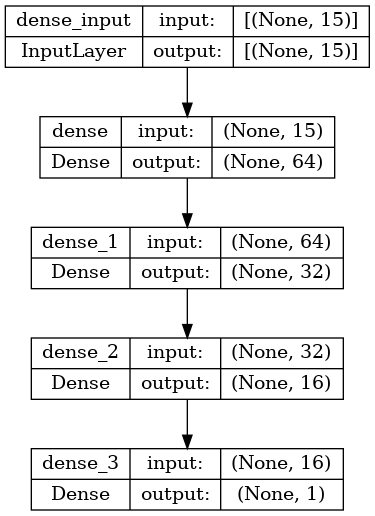

In [12]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 2ms/step - loss: 0.9639 - accuracy: 0.7328
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8785
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8745
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8785
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8745
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8745
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8745
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8745
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8745
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8745
Epoch 11/

In [15]:
# Get predicted values on new data
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9354838728904724


# ROC Curve

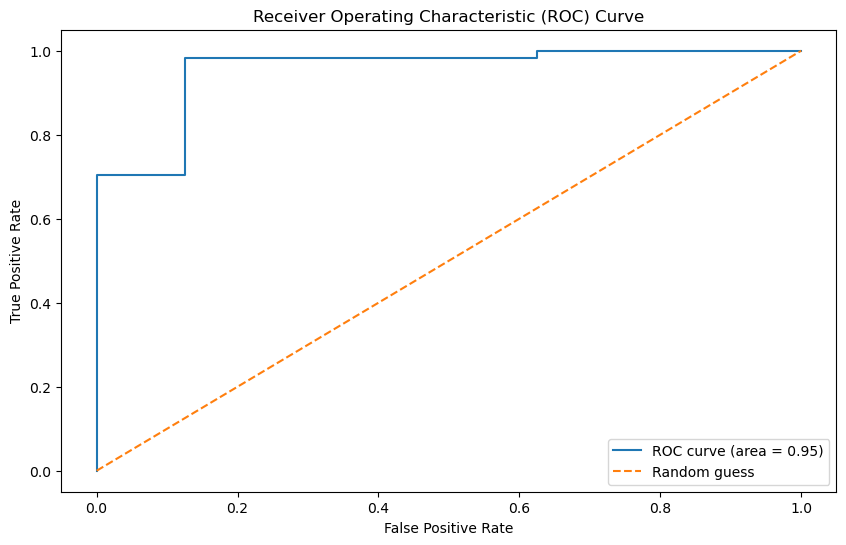

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true labels and predicted labels respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [18]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.951037,0.770600,-1.133454,0.867892,1.001617,-1.001617,-1.008121,0.695705,-1.118665,0.891030,0.891030,0.850827,0.747524,1.061779,0.891030
1,0.951037,1.379591,0.879404,-1.148488,-0.995155,-1.001617,0.988734,0.695705,0.891030,-1.118665,-1.118665,-1.171523,0.747524,1.061779,0.891030
2,-1.048081,-0.447382,-1.133454,-1.148488,-0.995155,0.995155,-1.008121,0.695705,-1.118665,0.891030,-1.118665,0.850827,0.747524,-0.938768,0.891030
3,0.951037,0.039811,0.879404,0.867892,1.001617,-1.001617,-1.008121,-1.432739,-1.118665,-1.118665,0.891030,-1.171523,-1.333421,1.061779,0.891030
4,-1.048081,0.039811,-1.133454,0.867892,-0.995155,-1.001617,-1.008121,-1.432739,-1.118665,0.891030,-1.118665,0.850827,0.747524,-0.938768,-1.118665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-1.048081,-0.812776,-1.133454,-1.148488,-0.995155,0.995155,0.988734,0.695705,-1.118665,-1.118665,0.891030,0.850827,0.747524,1.061779,-1.118665
305,0.951037,0.892399,0.879404,-1.148488,-0.995155,-1.001617,-1.008121,0.695705,0.891030,0.891030,0.891030,0.850827,0.747524,-0.938768,0.891030
306,0.951037,-0.569180,0.879404,-1.148488,-0.995155,-1.001617,-1.008121,-1.432739,0.891030,0.891030,0.891030,0.850827,-1.333421,-0.938768,0.891030
307,0.951037,0.527004,0.879404,-1.148488,1.001617,-1.001617,-1.008121,0.695705,0.891030,-1.118665,0.891030,0.850827,0.747524,-0.938768,0.891030


# KNN, LDA and BinaryTree

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# X_train is your training data
# y_train is the corresponding target values

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_train)
knn_acc = accuracy_score(y_train, knn_y_pred)

# LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_y_pred = lda.predict(X_train)
lda_acc = accuracy_score(y_train, lda_y_pred)

# Binary Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_y_pred = tree.predict(X_train)
tree_acc = accuracy_score(y_train, tree_y_pred)

# Print the accuracy of each model
print("KNN accuracy:", knn_acc)
print("LDA accuracy:", lda_acc)
print("Binary Tree accuracy:", tree_acc)


KNN accuracy: 0.8906882591093117
LDA accuracy: 0.9392712550607287
Binary Tree accuracy: 0.9959514170040485


# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X_train is your training data
# y_train is the corresponding target values

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_train)
nb_acc = accuracy_score(y_train, nb_y_pred)

# Print the accuracy of the model
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.9190283400809717


# t-Distributed Stochastic Neighbor Embedding (t-SNE)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


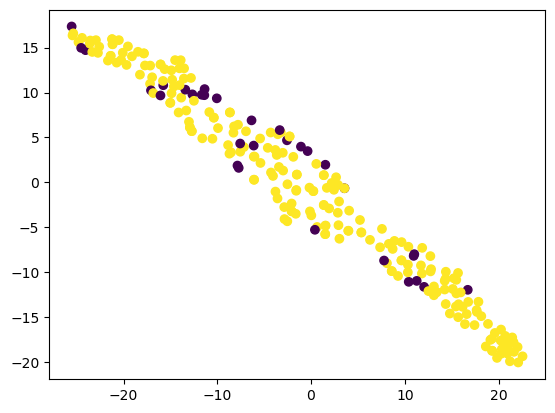

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X_train is your training data
# y_train is the corresponding target values

# t-SNE model
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Visualize the t-SNE embedding
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.show()
